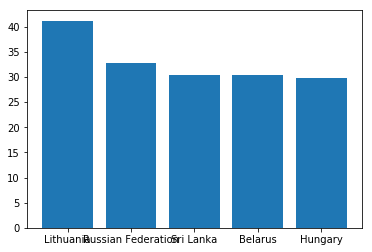

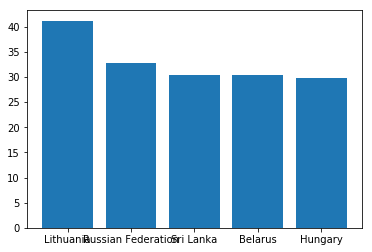

hecho


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import subprocess

#year = int(input('Enter the year: '))
#title = 'Top 10 Manufacturers by Fuel Efficiency ' + str(year)

title = 'Análisis sobre la tasa de suicidios mundial en el período 1985 - 2016'

#def acquire():
 #   data = pd.read_csv('./data sets/vehicles/vehicles.csv')
 #  return data

def acquire():
    data = pd.read_csv("suicide-rates-overview-1985-to-2016.csv")
    return data

#def wrangle(df):
 #   filtered = data[data['Year']==year]
  #  return filtered

def wrangle(data):
    
    data_no_dupl= data.drop_duplicates()
    data_clean=data_no_dupl.drop(['HDI for year','country-year'], axis=1)
    return data_clean
    

#def analyze(df):
 #   grouped = filtered.groupby('Make').agg({'Combined MPG':'mean'}).reset_index()
  #  results = grouped.sort_values('Combined MPG', ascending=False).head(10)
# return results

def analyze(data_clean):

    data_selected= data_clean[['country', 'suicides_no','population']]
    data_selected_grouped= data_selected.groupby(['country']).sum()
    data_selected_grouped['population(mean)'] = data_selected_grouped['population']/31
    data_selected_grouped['suicides_no/100k pop']= data_selected_grouped['suicides_no']/data_selected_grouped['population(mean)']*100000
    suicides_per_country_ord=data_selected_grouped.sort_values(by=['suicides_no/100k pop'], ascending=False)
    return suicides_per_country_ord
    

#def visualize(df):
 #   fig, ax = plt.subplots(figsize=(15,8))
  #  barchart = sns.barplot(data=results, x='Make', y='Combined MPG')
   # plt.title(title + "\n", fontsize=16)
    #return barchart
    
def visualize(suicides_per_country_ord):
    height = [41.18,32.77,30.48,30.34,29.71 ]
    bars = ('Lithuania', 'Russian Federation','Sri Lanka','Belarus','Hungary')
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height)
    plt.xticks(y_pos, bars)
    return plt.show()

def report_to(email):
    text = 'El informe actualizado ha sido enviado'
    command = 'echo {} | mail -s "Nuevo informe" {}'.format(text, email)
    subprocess.Popen(command, shell=True)
    return ("hecho")

#def save_viz(barchart):
 #   fig = barchart.get_figure()
  #  fig.savefig(title + '.png')

#def save_viz(plt):
   # fig = plt.get_figure()
    #fig.savefig('Paises con tasa se suicidios mas alta 1985 - 2016' + '.png')

if __name__ == '__main__':
    data = acquire()
    filtered = wrangle(data)
    results = analyze(filtered)
    barchart = visualize(results)

    #save_viz(plt)

df = acquire()
df.head()

df1= wrangle(df)
df1.head()

df2= analyze(df1)
df2.head()

df3=visualize(df2)
df3

email = 'laura.repullo.chacon@gmail.com'
a = report_to(email)
print(a)